<a href="https://colab.research.google.com/github/malik-tauzif/malik-tauzif/blob/main/padas_data_frame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# 1. Generate Random Data
def generate_random_data(rows=100):
    start_date = datetime(2023, 1, 1)
    data = {
        "date": [(start_date + timedelta(days=random.randint(0, 365))).strftime('%Y-%m-%d') for _ in range(rows)],
        "store_nbr": [random.randint(1, 50) for _ in range(rows)],
        "family": [random.choice(['Beverages', 'Snacks', 'Clothing', 'Electronics']) for _ in range(rows)],
        "sales": [round(random.uniform(100, 10000), 2) for _ in range(rows)],
        "onpromotion": [random.randint(0, 50) for _ in range(rows)],
    }
    return pd.DataFrame(data)

# 2. Create and Save the CSV File
df = generate_random_data(rows=100)
file_path = "sales_data.csv"
df.to_csv(file_path, index=False)

# 3. Read the CSV File
df_read = pd.read_csv(file_path, parse_dates=["date"])

# 4. Display the Data
print("Sample Data from the CSV File:")
print(df_read.head())


Sample Data from the CSV File:
        date  store_nbr       family    sales  onpromotion
0 2023-03-05         45       Snacks  1154.11            2
1 2023-04-25         32    Beverages  1491.26           23
2 2023-11-09         16  Electronics  3324.18           29
3 2023-10-24         20     Clothing  3546.97           24
4 2023-12-06         47    Beverages  2508.44            7


In [ ]:
df_read.groupby(['family','store_nbr'])['sales'].sum()

family     store_nbr
Beverages  4             4589.14
           7             8536.36
           8            17744.94
           9              894.41
           10            8552.97
                          ...   
Snacks     40            3082.21
           43            4946.57
           44             941.58
           45            6686.78
           50            1923.78
Name: sales, Length: 78, dtype: float64

In [ ]:
df_read.groupby(['store_nbr','family'])['sales'].sum()

store_nbr  family     
1          Clothing       2115.03
           Snacks         9341.98
2          Electronics    7127.29
4          Beverages      4589.14
           Clothing       1489.56
                           ...   
47         Electronics    5769.61
48         Beverages      3289.43
           Clothing       7294.80
50         Clothing       9211.56
           Snacks         1923.78
Name: sales, Length: 78, dtype: float64

In [ ]:
df_read.groupby(['family','store_nbr'],as_index=False)['sales'].sum()

,family,store_nbr,sales
0,Beverages,4,4589.14
1,Beverages,7,8536.36
2,Beverages,8,17744.94
3,Beverages,9,894.41
4,Beverages,10,8552.97
...,...,...,...
73,Snacks,40,3082.21
74,Snacks,43,4946.57
75,Snacks,44,941.58
76,Snacks,45,6686.78


In [ ]:
df_read.groupby(['family','store_nbr']).agg({"sales":["sum","mean"],"onpromotion":["min","max"]})

sales          onpromotion    
                          sum     mean         min max
family    store_nbr                                   
Beverages 4           4589.14  4589.14           3   3
          7           8536.36  8536.36          29  29
          8          17744.94  8872.47          28  42
          9            894.41   894.41          46  46
          10          8552.97  8552.97          42  42
...                       ...      ...         ...  ..
Snacks    40          3082.21  3082.21          21  21
          43          4946.57  4946.57          21  21
          44           941.58   941.58          47  47
          45          6686.78  6686.78          47  47
          50          1923.78  1923.78          17  17

[78 rows x 4 columns]

In [ ]:
df_read.groupby(['family','store_nbr']).agg(sales_sum=("sales","sum"),onpromotion_max=("onpromotion","max"))

sales_sum  onpromotion_max
family    store_nbr                            
Beverages 1            3054.62               24
          2            6522.71               37
          3            5645.11               20
          7            6841.75                7
          14           6983.00               40
...                        ...              ...
Snacks    41           5314.90               35
          42           3670.68               49
          45           1154.11                2
          46          14528.14               50
          50           6014.07               39

[80 rows x 2 columns]

In [ ]:
 df_read.assign(temp_col=(df_read.groupby('store_nbr')['sales'].sum()))

,date,store_nbr,family,sales,onpromotion,temp_col
0,2023-12-28,7,Electronics,2524.77,24,NaN
1,2023-08-26,32,Beverages,888.78,7,3389.38
2,2023-03-02,12,Beverages,8296.14,0,14579.74
3,2023-08-17,47,Beverages,4649.13,41,6573.90
4,2023-02-28,47,Beverages,5951.75,18,4305.11
...,...,...,...,...,...,...
95,2023-02-19,28,Snacks,2615.71,26,NaN
96,2023-12-04,10,Electronics,658.27,44,NaN
97,2023-01-01,22,Clothing,2474.73,40,NaN
98,2023-09-20,42,Beverages,5271.67,24,NaN


In [ ]:
df_read.assign(temp_col_2=(df_read.groupby('store_nbr')['sales'].transform('sum')))

,date,store_nbr,family,sales,onpromotion,temp_col_2
0,2023-12-28,7,Electronics,2524.77,24,6892.82
1,2023-08-26,32,Beverages,888.78,7,3877.23
2,2023-03-02,12,Beverages,8296.14,0,14834.44
3,2023-08-17,47,Beverages,4649.13,41,24018.77
4,2023-02-28,47,Beverages,5951.75,18,24018.77
...,...,...,...,...,...,...
95,2023-02-19,28,Snacks,2615.71,26,13280.63
96,2023-12-04,10,Electronics,658.27,44,13302.32
97,2023-01-01,22,Clothing,2474.73,40,9559.81
98,2023-09-20,42,Beverages,5271.67,24,5271.67


In [ ]:
df_read.query("family in ['Clothing','Beverages','Snacks']")

,date,store_nbr,family,sales,onpromotion
0,2023-03-05,45,Snacks,1154.11,2
1,2023-04-25,32,Beverages,1491.26,23
3,2023-10-24,20,Clothing,3546.97,24
4,2023-12-06,47,Beverages,2508.44,7
5,2023-08-06,31,Snacks,8833.99,11
...,...,...,...,...,...
93,2023-11-30,10,Snacks,4787.91,35
95,2023-01-08,38,Snacks,9702.79,26
97,2023-01-16,48,Beverages,7758.66,18
98,2023-08-12,10,Clothing,4265.80,21


In [ ]:
# groupby, agg, transform, .pivot_table
df_read.query("family in ['Clothing','Beverages','Snacks']").pivot_table(index='family',columns='date',values='sales',aggfunc='sum')

date,2023-01-11,2023-01-17,2023-01-29,2023-02-07,2023-02-10,2023-02-16,2023-02-17,2023-02-18,2023-02-20,2023-02-26,...,2023-11-08,2023-11-13,2023-11-19,2023-11-22,2023-11-24,2023-12-03,2023-12-12,2023-12-13,2023-12-28,2023-12-29
family,,,,,,,,,,,,,,,,,,,,,
Beverages,NaN,784.92,NaN,NaN,3859.63,NaN,NaN,5271.52,NaN,NaN,...,NaN,NaN,8682.18,NaN,NaN,NaN,NaN,8168.26,8954.18,NaN
Clothing,NaN,NaN,6057.74,3733.24,NaN,NaN,NaN,NaN,NaN,7195.96,...,7418.07,8401.52,NaN,NaN,NaN,2289.81,NaN,NaN,NaN,7833.94
Snacks,4214.78,NaN,NaN,NaN,NaN,5208.16,6833.4,NaN,5856.59,NaN,...,NaN,NaN,NaN,9412.16,9115.88,NaN,1123.92,NaN,NaN,NaN


In [ ]:
df_read.query("family in ['Clothing','Beverages','Snacks']").pivot_table(index='family',columns='date',values='sales',aggfunc='sum',margins=True)

date,2023-01-11 00:00:00,2023-01-17 00:00:00,2023-01-29 00:00:00,2023-02-07 00:00:00,2023-02-10 00:00:00,2023-02-16 00:00:00,2023-02-17 00:00:00,2023-02-18 00:00:00,2023-02-20 00:00:00,2023-02-26 00:00:00,...,2023-11-13 00:00:00,2023-11-19 00:00:00,2023-11-22 00:00:00,2023-11-24 00:00:00,2023-12-03 00:00:00,2023-12-12 00:00:00,2023-12-13 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,All
family,,,,,,,,,,,,,,,,,,,,,
Beverages,NaN,784.92,NaN,NaN,3859.63,NaN,NaN,5271.52,NaN,NaN,...,NaN,8682.18,NaN,NaN,NaN,NaN,8168.26,8954.18,NaN,77540.54
Clothing,NaN,NaN,6057.74,3733.24,NaN,NaN,NaN,NaN,NaN,7195.96,...,8401.52,NaN,NaN,NaN,2289.81,NaN,NaN,NaN,7833.94,166515.57
Snacks,4214.78,NaN,NaN,NaN,NaN,5208.16,6833.4,NaN,5856.59,NaN,...,NaN,NaN,9412.16,9115.88,NaN,1123.92,NaN,NaN,NaN,138521.91
All,4214.78,784.92,6057.74,3733.24,3859.63,5208.16,6833.4,5271.52,5856.59,7195.96,...,8401.52,8682.18,9412.16,9115.88,2289.81,1123.92,8168.26,8954.18,7833.94,382578.02


In [ ]:
df_read.query("family in ['Clothing','Beverages','Snacks']").pivot_table(index='family',columns='date',values='sales',aggfunc=('sum','mean'))

mean                                                         \
date      2023-01-11 2023-01-17 2023-01-29 2023-02-07 2023-02-10 2023-02-16   
family                                                                        
Beverages        NaN     784.92        NaN        NaN    3859.63        NaN   
Clothing         NaN        NaN    6057.74    3733.24        NaN        NaN   
Snacks       4214.78        NaN        NaN        NaN        NaN    5208.16   

                                                       ...        sum  \
date      2023-02-17 2023-02-18 2023-02-20 2023-02-26  ... 2023-11-08   
family                                                 ...              
Beverages        NaN    5271.52        NaN        NaN  ...        NaN   
Clothing         NaN        NaN        NaN    7195.96  ...    7418.07   
Snacks        6833.4        NaN    5856.59        NaN  ...        NaN   

                                                                             \
date      2023-11-13 2023-11-19 2023-11-22 2023-11-24 2023-12-03 2023-12-12   
family                                                                        
Beverages        NaN    8682.18        NaN        NaN        NaN        NaN   
Clothing     8401.52        NaN        NaN        NaN    2289.81        NaN   
Snacks           NaN        NaN    9412.16    9115.88        NaN    1123.92   

                                            
date      2023-12-13 2023-12-28 2023-12-29  
family                                      
Beverages    8168.26    8954.18        NaN  
Clothing         NaN        NaN    7833.94  
Snacks           NaN        NaN        NaN  

[3 rows x 130 columns]

<Axes: >

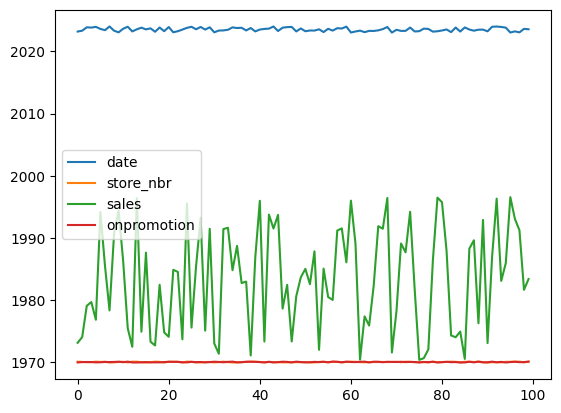

In [ ]:
df_read.plot()

<Axes: xlabel='date'>

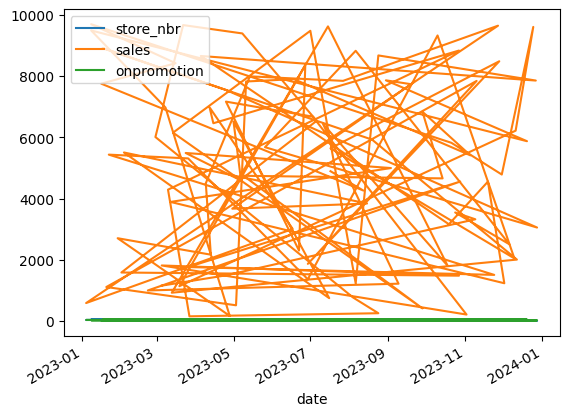

In [ ]:
df_read.plot(x='date')

<Axes: xlabel='date'>

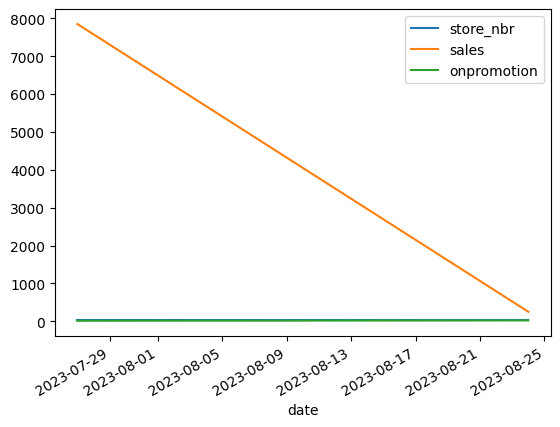

In [ ]:
df_read.query('store_nbr == 33').plot(x='date')

<Axes: xlabel='date'>

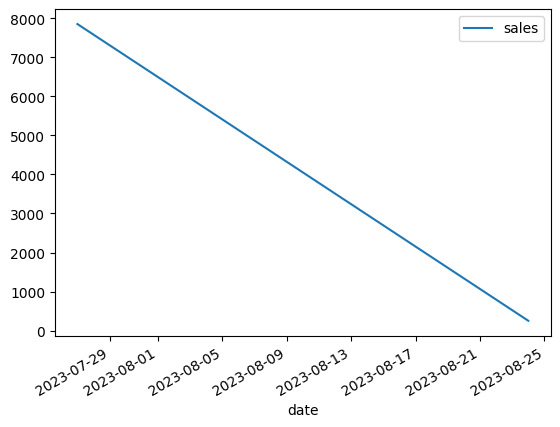

In [ ]:
df_read.query('store_nbr == 33').plot(x='date',y='sales')

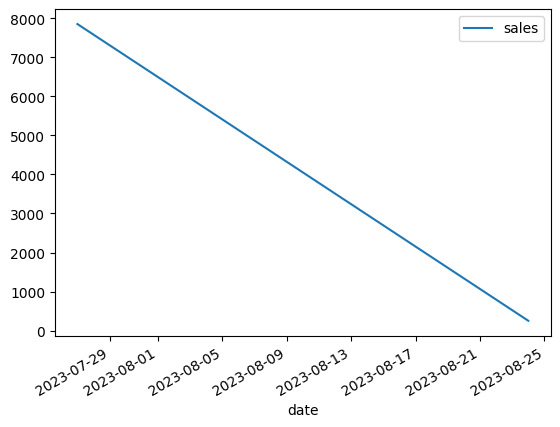

In [ ]:
df_read.query('store_nbr == 33').plot(x='date',y='sales');

<Axes: xlabel='date'>

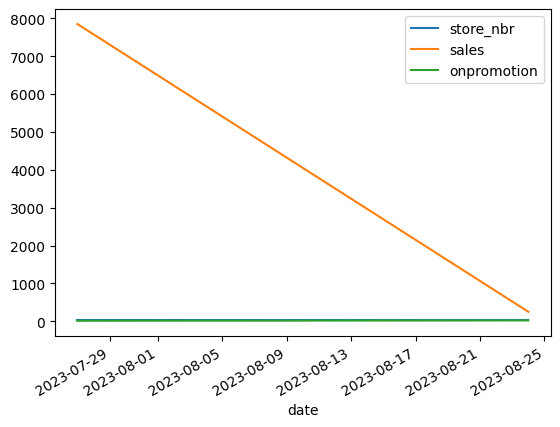

In [ ]:
df_read.query('store_nbr == 33').set_index('date').plot()

<Axes: xlabel='date'>

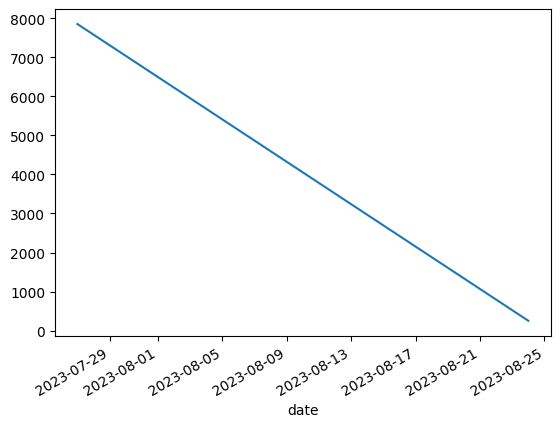

In [ ]:
df_read.query('store_nbr == 33').set_index('date').loc[:,'sales'].plot()

<Axes: xlabel='date'>

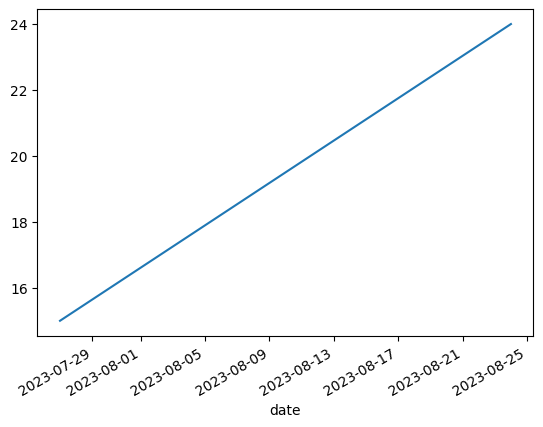

In [ ]:
df_read.query('store_nbr == 33').set_index('date').iloc[:7,3].plot()

<Axes: xlabel='date'>

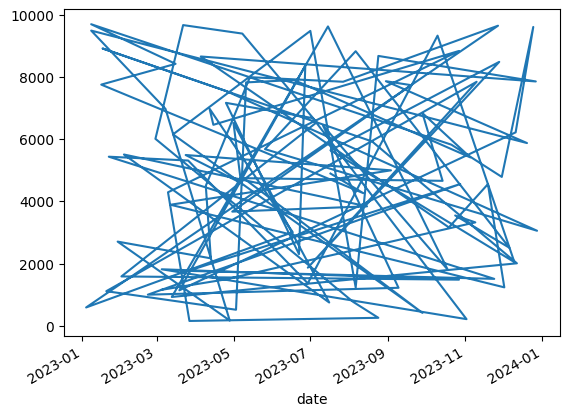

In [ ]:
df_read.set_index('date').loc[:,'sales'].plot()

<Axes: xlabel='date'>

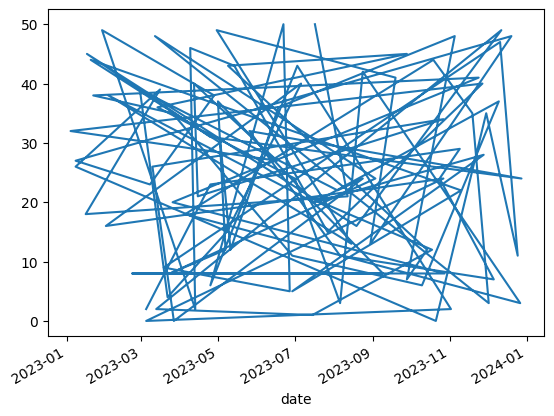

In [ ]:
df_read.set_index('date').loc[:,'onpromotion'].plot()

In [ ]:
df_read.query('store_nbr == 33')

,date,store_nbr,family,sales,onpromotion
67,2023-07-27,33,Clothing,7850.75,15
76,2023-08-24,33,Snacks,252.52,24


In [ ]:
df_read.query('store_nbr == 33').pivot(index='date',columns='family')

store_nbr           sales         onpromotion       
family      Clothing Snacks Clothing  Snacks    Clothing Snacks
date                                                           
2023-07-27      33.0    NaN  7850.75     NaN        15.0    NaN
2023-08-24       NaN   33.0      NaN  252.52         NaN   24.0

In [ ]:
df_read.query('store_nbr == 33').set_index('date')

,store_nbr,family,sales,onpromotion
date,,,,
2023-07-27,33,Clothing,7850.75,15
2023-08-24,33,Snacks,252.52,24


In [ ]:
df_read.query('store_nbr == 33').set_index('date').loc[:,'onpromotion']

,onpromotion
date,
2023-07-27,15
2023-08-24,24


<Axes: xlabel='date'>

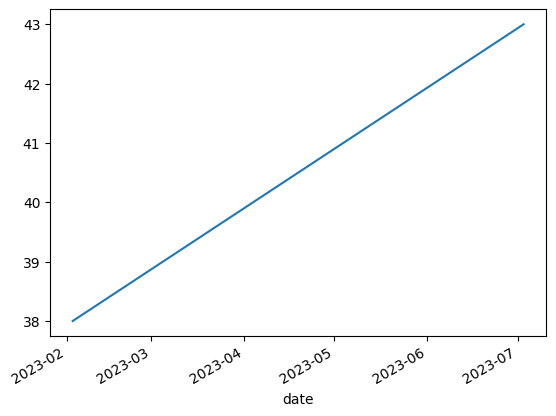

In [ ]:
df_read.query('store_nbr == 44').set_index('date').loc[:,'onpromotion'].plot()

<Axes: xlabel='date'>

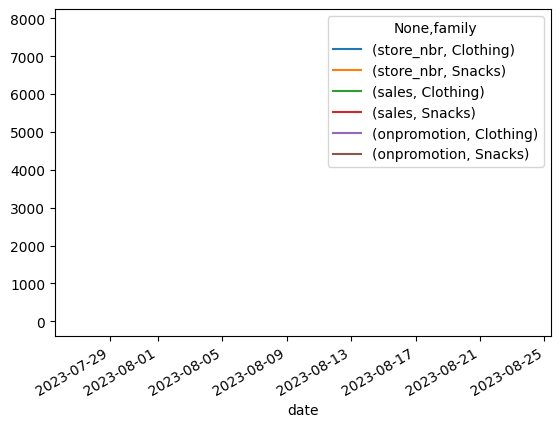

In [ ]:
df_read.query('store_nbr == 33').pivot(index='date',columns='family').plot()

In [ ]:
df_read.loc[df_read['store_nbr'] == 38, ['date','onpromotion']]

,date,onpromotion
25,2023-12-10,37
61,2023-03-08,23
85,2023-11-02,2
94,2023-10-21,0
95,2023-01-08,26


In [ ]:
df_read.loc[df_read['store_nbr'] == 38, ['date','onpromotion']].set_index('date')

,onpromotion
date,
2023-12-10,37
2023-03-08,23
2023-11-02,2
2023-10-21,0
2023-01-08,26


<Axes: xlabel='date'>

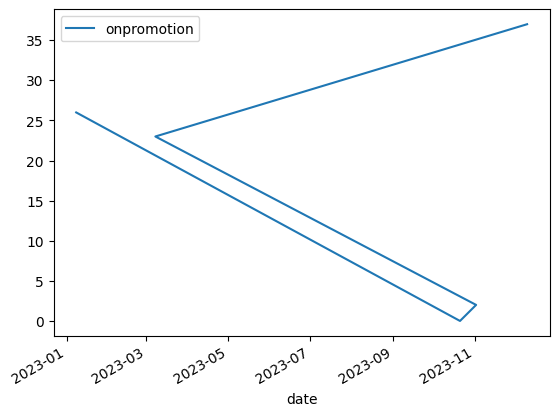

In [ ]:
df_read.loc[df_read['store_nbr'] == 38, ['date','onpromotion']].set_index('date').plot()

In [ ]:
df_read.query("store_nbr in [44,38]")#, ['date','onpromotion']].set_index('date').plot(kind='bar')

,date,store_nbr,family,sales,onpromotion
25,2023-12-10,38,Snacks,2045.13,37
54,2023-02-03,44,Clothing,5509.10,38
61,2023-03-08,38,Electronics,6977.82,23
85,2023-11-02,38,Snacks,209.44,2
86,2023-07-03,44,Electronics,6679.78,43
94,2023-10-21,38,Electronics,5824.77,0
95,2023-01-08,38,Snacks,9702.79,26


In [ ]:
df_read.query("store_nbr in [44,38]").pivot(index='date',columns='store_nbr')

family                 sales          onpromotion      
store_nbr            38           44       38       44          38    44
date                                                                    
2023-01-08       Snacks          NaN  9702.79      NaN        26.0   NaN
2023-02-03          NaN     Clothing      NaN  5509.10         NaN  38.0
2023-03-08  Electronics          NaN  6977.82      NaN        23.0   NaN
2023-07-03          NaN  Electronics      NaN  6679.78         NaN  43.0
2023-10-21  Electronics          NaN  5824.77      NaN         0.0   NaN
2023-11-02       Snacks          NaN   209.44      NaN         2.0   NaN
2023-12-10       Snacks          NaN  2045.13      NaN        37.0   NaN

In [ ]:
df_read.query("store_nbr in [44,38]").pivot(index='date',columns='store_nbr').droplevel(0,axis=1)

store_nbr,38,44,38,44,38,44
date,,,,,,
2023-01-08,Snacks,NaN,9702.79,NaN,26.0,NaN
2023-02-03,NaN,Clothing,NaN,5509.10,NaN,38.0
2023-03-08,Electronics,NaN,6977.82,NaN,23.0,NaN
2023-07-03,NaN,Electronics,NaN,6679.78,NaN,43.0
2023-10-21,Electronics,NaN,5824.77,NaN,0.0,NaN
2023-11-02,Snacks,NaN,209.44,NaN,2.0,NaN
2023-12-10,Snacks,NaN,2045.13,NaN,37.0,NaN


<Axes: xlabel='date'>

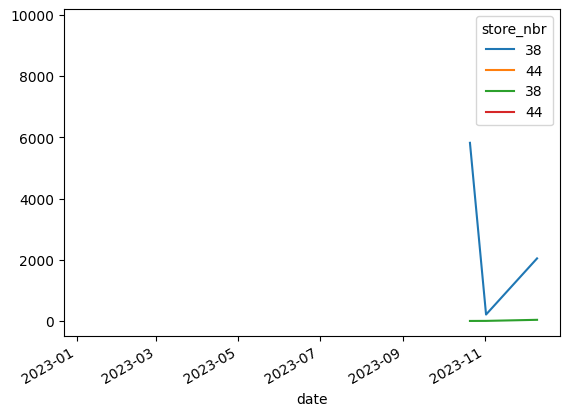

In [ ]:
df_read.query("store_nbr in [44,38]").pivot(index='date',columns='store_nbr').droplevel(0,axis=1).plot()

In [ ]:
df_read.set_index('date')

,store_nbr,family,sales,onpromotion
date,,,,
2023-03-05,45,Snacks,1154.11,2
2023-04-25,32,Beverages,1491.26,23
2023-11-09,16,Electronics,3324.18,29
2023-10-24,20,Clothing,3546.97,24
2023-12-06,47,Beverages,2508.44,7
...,...,...,...,...
2023-01-08,38,Snacks,9702.79,26
2023-03-16,49,Electronics,8427.76,39
2023-01-16,48,Beverages,7758.66,18


<Axes: xlabel='date'>

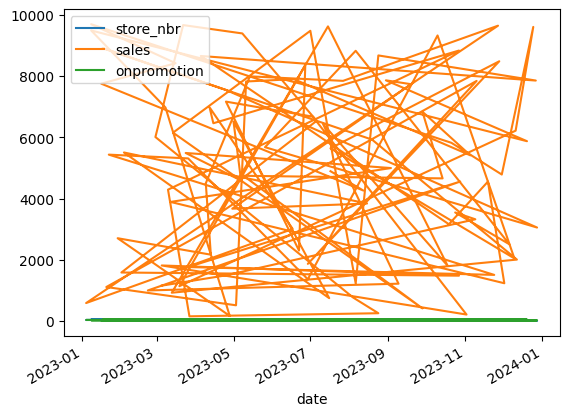

In [ ]:
df_read.set_index('date').loc["2023"].plot()

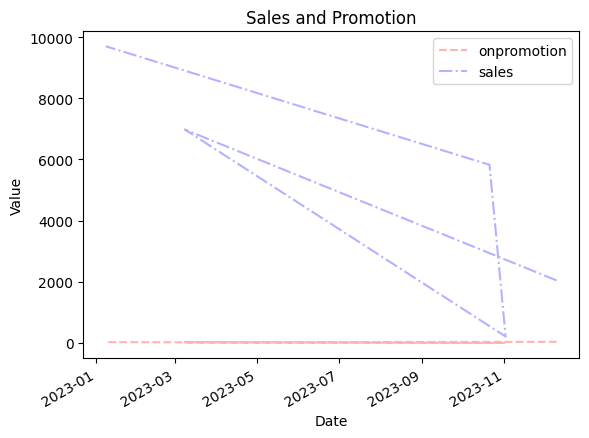

In [ ]:
df_read.query('store_nbr == 38').set_index('date').loc[:,["onpromotion","sales"]].plot(
    title='Sales and Promotion',
    xlabel='Date',
    ylabel='Value',
    color=['red','blue'],
    alpha=.3,
    style=['--','-.']
);

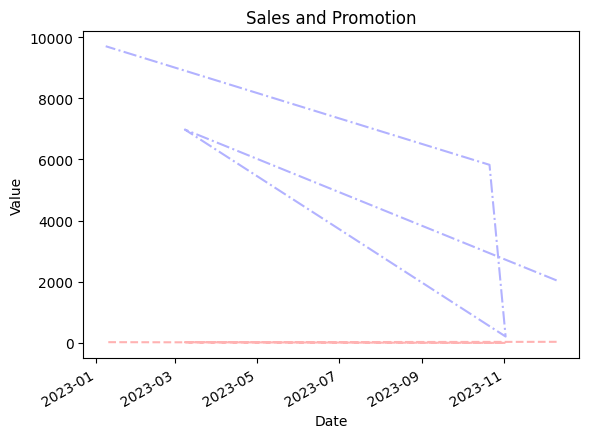

In [ ]:
df_read.query('store_nbr == 38').set_index('date').loc[:,["onpromotion","sales"]].plot(
    title='Sales and Promotion',
    xlabel='Date',
    ylabel='Value',
    color=['red','blue'],
    alpha=.3,
    style=['--','-.'],
    legend=False
);

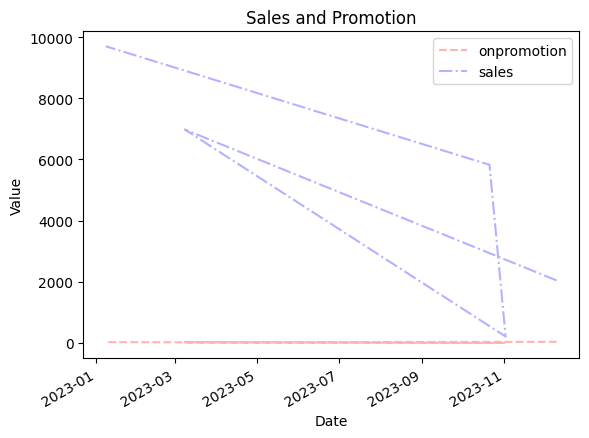

In [ ]:
df_read.query('store_nbr == 38').set_index('date').loc[:,["onpromotion","sales"]].plot(
    title='Sales and Promotion',
    xlabel='Date',
    ylabel='Value',
    color=['red','blue'],
    alpha=.3,
    style=['--','-.']
).legend(loc='best')

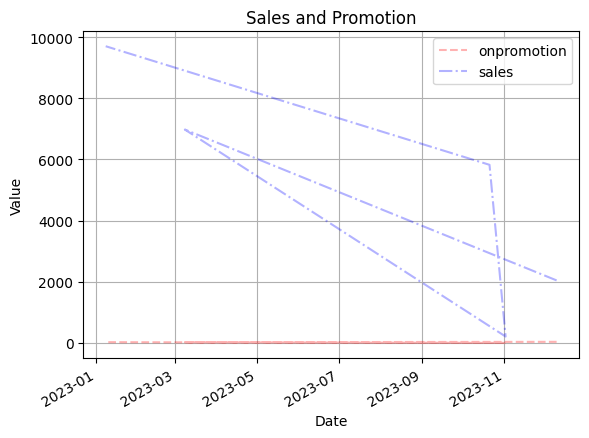

In [ ]:
df_read.query('store_nbr == 38').set_index('date').loc[:,["onpromotion","sales"]].plot(
    title='Sales and Promotion',
    xlabel='Date',
    ylabel='Value',
    color=['red','blue'],
    alpha=.3,
    style=['--','-.'],
    grid=True
).legend(loc='best')

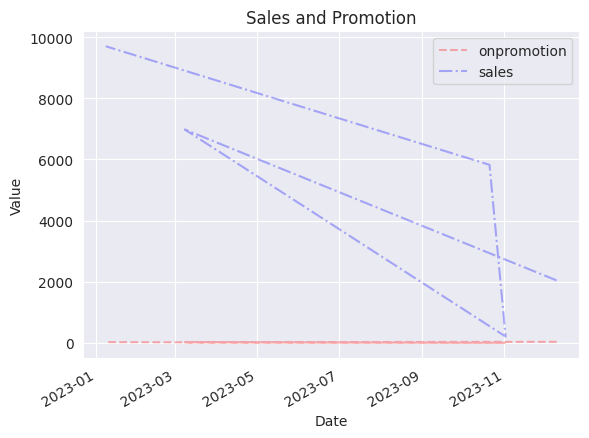

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')


df_read.query('store_nbr == 38').set_index('date').loc[:,["onpromotion","sales"]].plot(
    title='Sales and Promotion',
    xlabel='Date',
    ylabel='Value',
    color=['red','blue'],
    alpha=.3,
    style=['--','-.'],
    grid=True
).legend(loc='best');

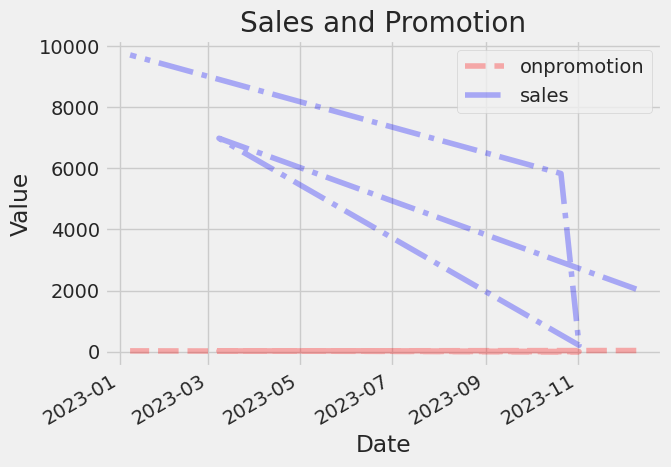

In [ ]:
import matplotlib

matplotlib.style.use('fivethirtyeight')


df_read.query('store_nbr == 38').set_index('date').loc[:,["onpromotion","sales"]].plot(
    title='Sales and Promotion',
    xlabel='Date',
    ylabel='Value',
    color=['red','blue'],
    alpha=.3,
    style=['--','-.'],
    grid=True
).legend(loc='best');

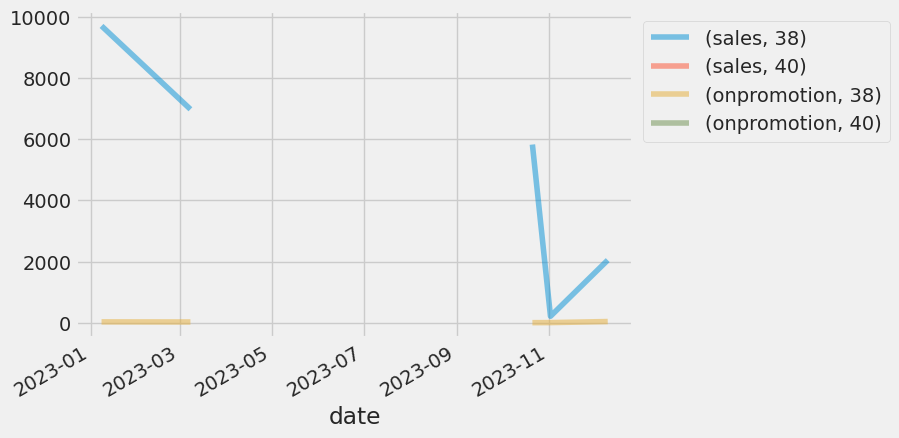

In [ ]:
df_read.query('store_nbr in [38,40]').pivot(index='date',columns='store_nbr').plot(alpha=.5,grid=True).legend(bbox_to_anchor=(1,1))

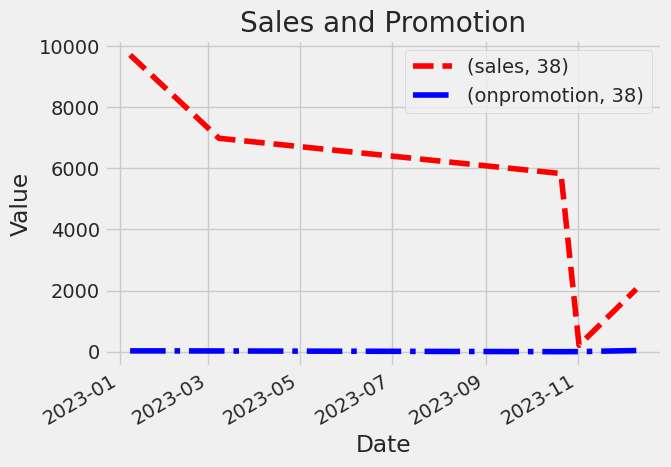

In [ ]:
import matplotlib

matplotlib.style.use('fivethirtyeight')


(df_read
  .query('store_nbr == 38')
  .pivot(index='date',columns='store_nbr')
  .plot(
    title='Sales and Promotion',
    xlabel='Date',
    ylabel='Value',
    color=['red','blue'],
    #alpha=.3,
    style=['--','-.'],
    grid=True
).legend(bbox_to_anchor=(1,1))
);

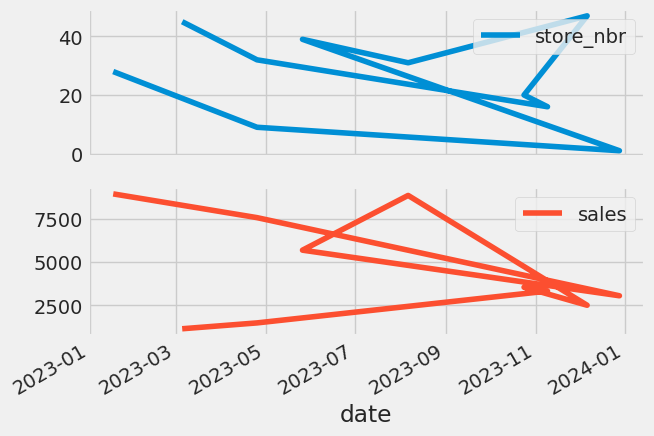

In [ ]:
df_read.set_index('date').iloc[:10,:3].plot(subplots=True);

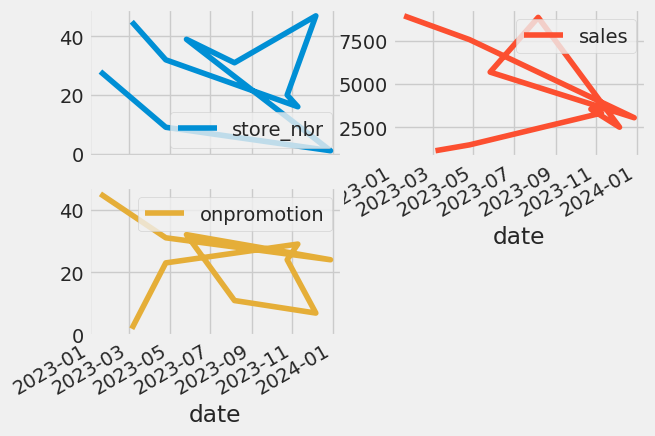

In [ ]:
df_read.set_index('date').iloc[:10,:].plot(subplots=True,layout=(2,2));

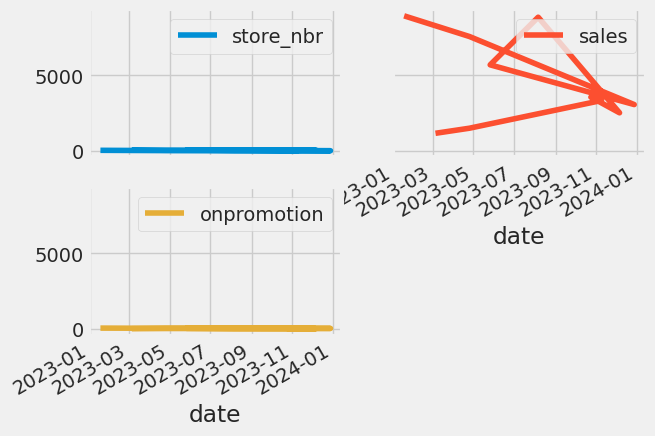

In [ ]:
df_read.set_index('date').iloc[:10,:].plot(subplots=True,layout=(2,2),sharey=True);

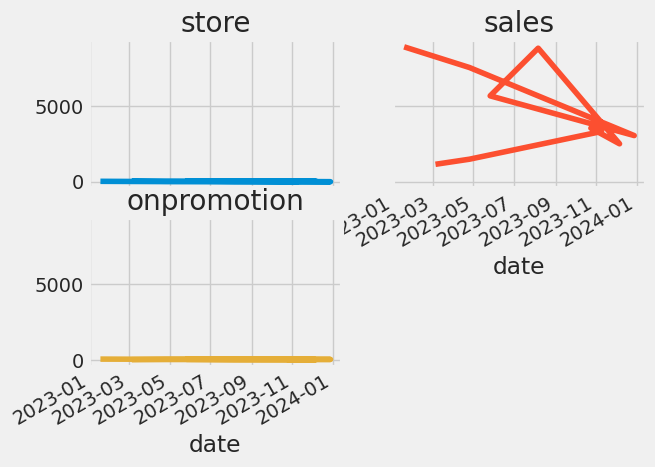

In [ ]:
df_read.set_index('date').iloc[:10,:].plot(subplots=True,layout=(2,2),sharey=True,legend=False,title=['store','sales','onpromotion']);

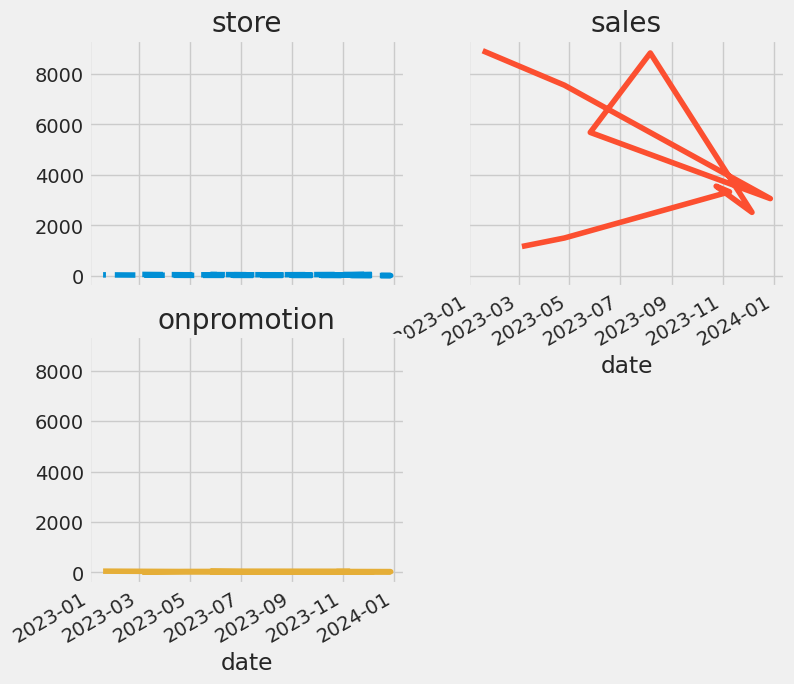

In [ ]:
df_read.set_index('date').iloc[:10,:].plot(
    figsize=(8,8),
    subplots=True,
    layout=(2,2),
    sharey=True,
    legend=False,
    title=['store','sales','onpromotion'],
    style=['--']
);

In [4]:
from google.colab import files

# Upload the file from your system
uploaded = files.upload()

# Check if the file uploaded successfully
import pandas as pd
df = pd.read_csv("transactions.csv", parse_dates=['date'])
print(df.head())

Saving transactions.csv to transactions (4).csv
        date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922


In [5]:
df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
df.groupby(['store_nbr'])['transactions'].sum().head()

,transactions
store_nbr,
1,2553963
2,3219901
3,5366350
4,2519007
5,2347877


<Axes: xlabel='store_nbr'>

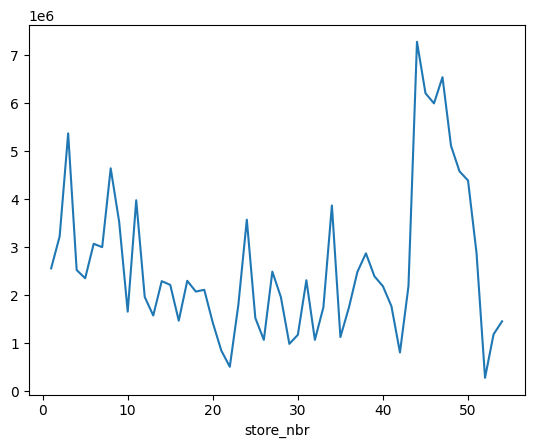

In [ ]:
df.groupby(['store_nbr'])['transactions'].sum().plot()

In [ ]:
df.groupby(['store_nbr']).agg({'transactions':'sum'}).head()

,transactions
store_nbr,
1,2553963
2,3219901
3,5366350
4,2519007
5,2347877


<Axes: xlabel='store_nbr'>

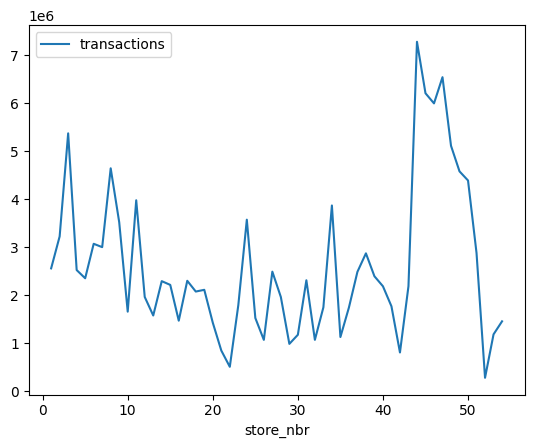

In [ ]:
df.groupby(['store_nbr']).agg({'transactions':'sum'}).plot()

In [ ]:
df.groupby(['store_nbr']).agg({'transactions':'sum'}).head()

,transactions
store_nbr,
1,2553963
2,3219901
3,5366350
4,2519007
5,2347877


<Axes: xlabel='store_nbr'>

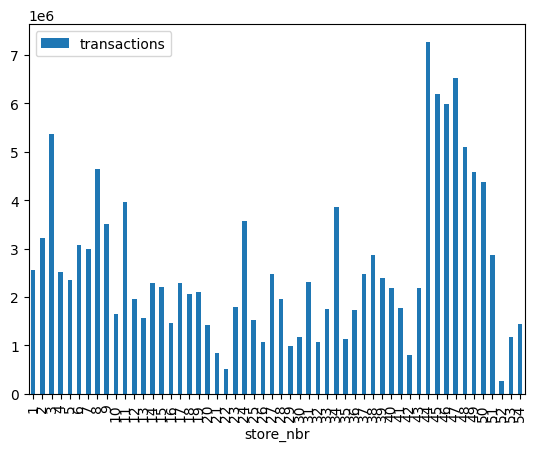

In [ ]:
df.groupby(['store_nbr']).agg({'transactions':'sum'}).plot.bar()

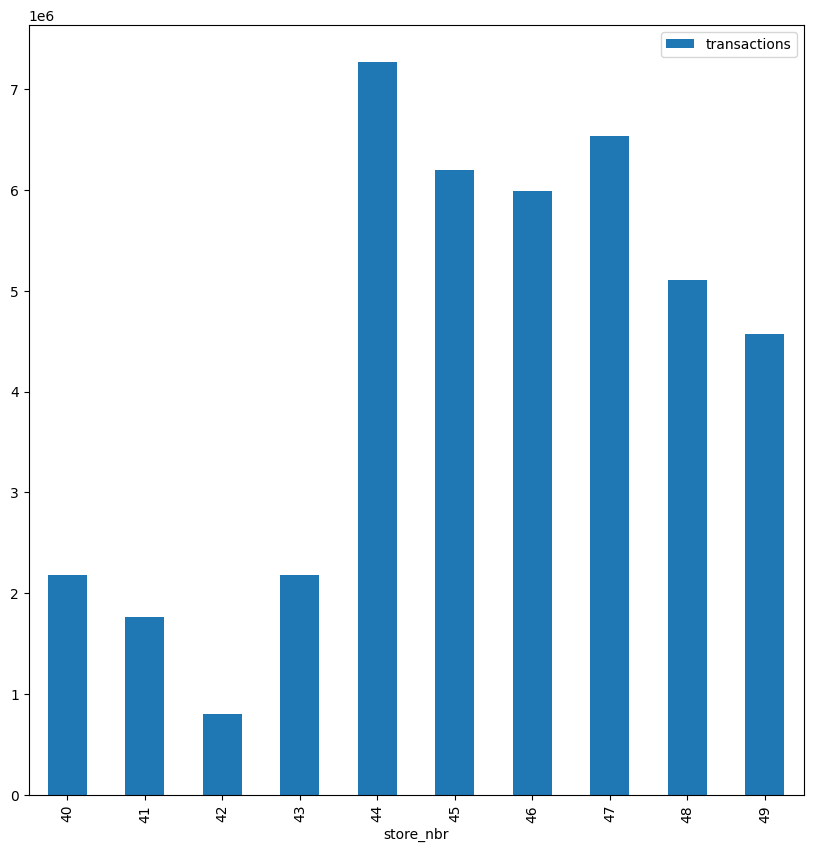

In [ ]:
store_40_50=list(range(40,50))
(
df
  .query('store_nbr in @store_40_50')
  .groupby(['store_nbr'])
  .agg({'transactions':'sum'})
  .plot.bar(figsize=(10,10))
);

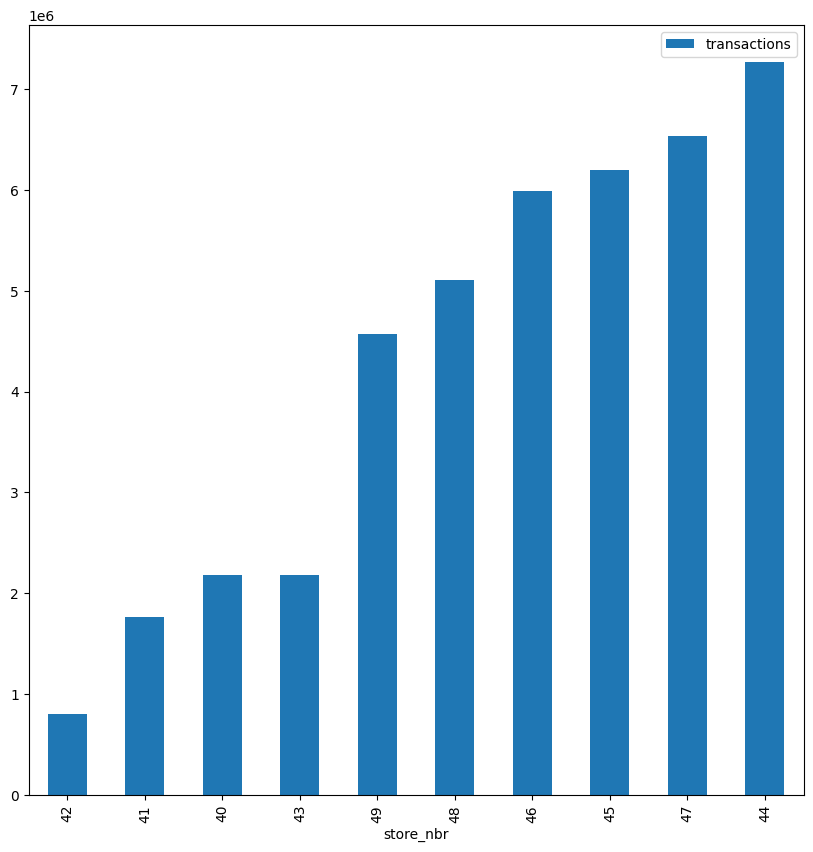

In [ ]:
store_40_50=list(range(40,50))
(df
 .query('store_nbr in @store_40_50')
 .groupby(['store_nbr'])
 .agg({'transactions':'sum'})
 .sort_values('transactions')
 .plot.bar(figsize=(10,10))
);

In [ ]:
df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [41]:
store_40_50=list(range(40,50))
df.query('store_nbr in @store_40_50 and date.dt.month in [1,2,3]')

,date,store_nbr,transactions
35,2013-01-02,40,1178
36,2013-01-02,41,915
37,2013-01-02,43,1385
38,2013-01-02,44,4821
39,2013-01-02,45,4208
...,...,...,...
76100,2017-03-31,45,3967
76101,2017-03-31,46,3295
76102,2017-03-31,47,3870
76103,2017-03-31,48,2719


In [50]:
df.query('store_nbr in @store_40_50 and date.dt.month in [1,2,3]').pivot_table(index=df['date'].dt.month,columns='store_nbr',values='transactions',aggfunc='sum')

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071


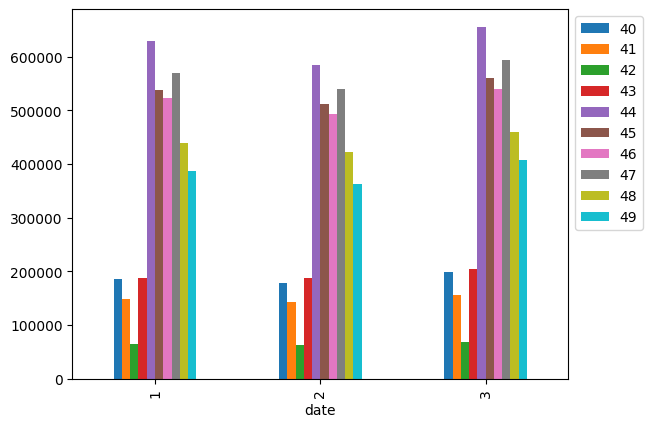

In [46]:
store_40_50=list(range(40,50))
(
df
  .query('store_nbr in @store_40_50 and date.dt.month in [1,2,3]')
  .pivot_table(index=df['date'].dt.month,columns='store_nbr',values='transactions',aggfunc='sum')
  .plot.bar()
  .legend(bbox_to_anchor=(1,1))
);

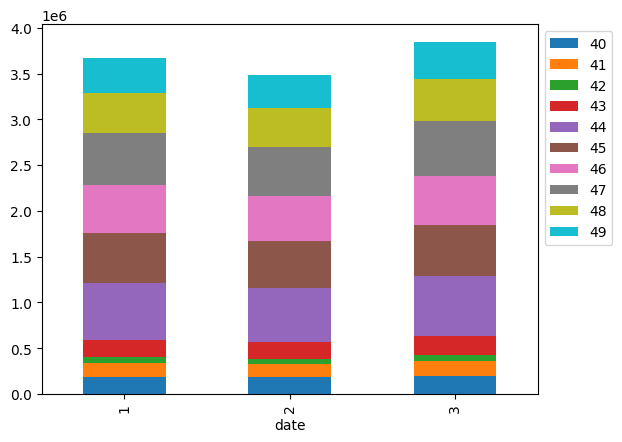

In [52]:
from inspect import stack
store_40_50=list(range(40,50))
(
df
  .query('store_nbr in @store_40_50 and date.dt.month in [1,2,3]')
  .pivot_table(index=df['date'].dt.month,columns='store_nbr',values='transactions',aggfunc='sum')
  .plot.bar(stacked=True)
  .legend(bbox_to_anchor=(1,1))
);

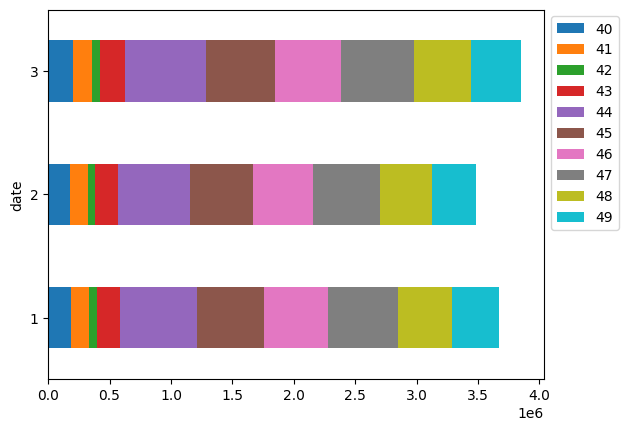

In [58]:
from inspect import stack
store_40_50=list(range(40,50))
(
df
  .query('store_nbr in @store_40_50 and date.dt.month in [1,2,3]')
  .pivot_table(index=df['date'].dt.month,columns='store_nbr',values='transactions',aggfunc='sum')
  .plot.barh(stacked=True)
  .legend(bbox_to_anchor=(1,1))
);

In [53]:
 df.query('store_nbr in @store_40_50 and date.dt.month in [1,2,3]').pivot_table(index=df['date'].dt.month,columns='store_nbr',values='transactions',aggfunc='sum')

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071


In [55]:
result = (
    df
    .query('store_nbr in @store_40_50 and date.dt.month in [1,2,3]')
    .pivot_table(
        index=df['date'].dt.month,
        columns='store_nbr',
        values='transactions',
        aggfunc='sum'
    )
    .apply(lambda x: x * 100 / sum(x), axis=1)
)

result


store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,5.052344,4.042938,1.763867,5.138606,17.117285,14.664028,14.238927,15.493529,11.958631,10.529844
2,5.143092,4.116339,1.790748,5.365099,16.760887,14.676416,14.150929,15.481162,12.115043,10.400287
3,5.194765,4.062374,1.760438,5.299201,17.045413,14.589956,14.046847,15.449572,11.968187,10.583246


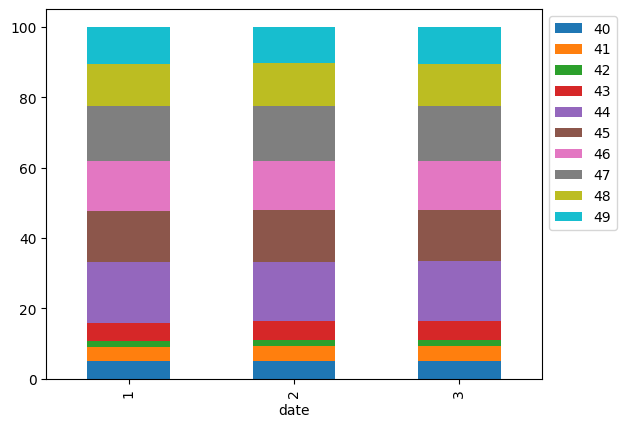

In [57]:
from inspect import stack
store_40_50=list(range(40,50))
(
df
  .query('store_nbr in @store_40_50 and date.dt.month in [1,2,3]')
  .pivot_table(index=df['date'].dt.month,
               columns=df['store_nbr'],
               values='transactions',
               aggfunc='sum').apply(lambda x: x * 100 / sum(x), axis=1)
  .plot.bar(stacked=True)
  .legend(bbox_to_anchor=(1,1))
);

In [59]:
df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [66]:
store_40=list(range(40,50))
df.query('store_nbr in @store_40').groupby('store_nbr').agg({'transactions':'sum'})

,transactions
store_nbr,
40,2181195
41,1764146
42,802646
43,2182356
44,7273093
45,6201115
46,5990113
47,6535810
48,5107785


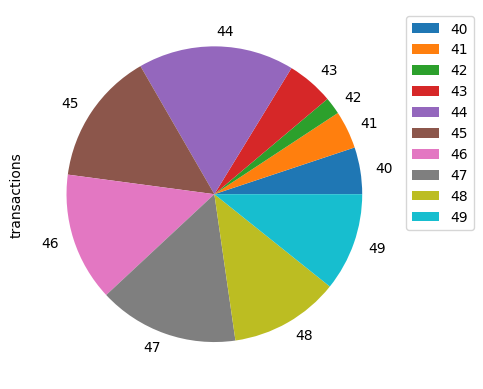

In [70]:
store_40=list(range(40,50))
(df
 .query('store_nbr in @store_40').groupby('store_nbr').agg({'transactions':'sum'})
 .plot.pie(y='transactions')
 .legend(bbox_to_anchor=(1,1))
);

In [8]:
store_40=list(range(40,50))
(df.query('store_nbr in @store_40')
   .pivot_table(index=df['date'].dt.month, columns='store_nbr', values='transactions', aggfunc='sum')
)

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071
4,194785,152869,66870,195502,637139,549474,535584,586216,454378,402373
5,208281,166079,69883,202376,671126,570956,554270,597380,469508,421413
6,196988,155688,67692,190156,631016,541302,516034,562559,436015,401579
7,203107,161205,70549,201074,645571,563700,531886,577574,454707,407053
8,182747,146306,63371,182532,596279,514143,485675,524983,419362,365448
9,151905,119653,64763,146055,516233,422178,412455,455021,353820,317871


<Axes: xlabel='44', ylabel='47'>

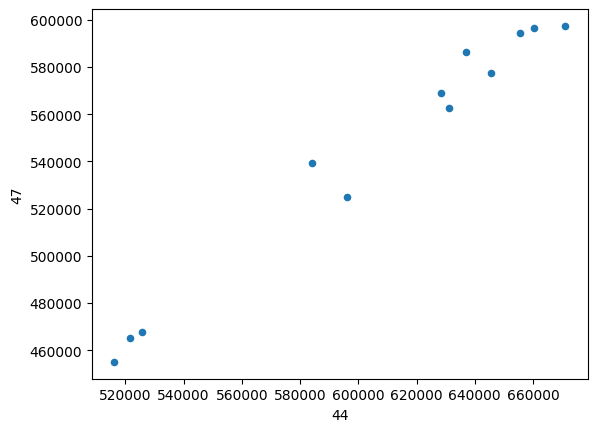

In [12]:
store_40=list(range(40,50))
(df.query('store_nbr in @store_40')
   .pivot_table(index=df['date'].dt.month, columns='store_nbr', values='transactions', aggfunc='sum')
   .plot.scatter(x=44,y=47)
)

<Axes: xlabel='2', ylabel='3'>

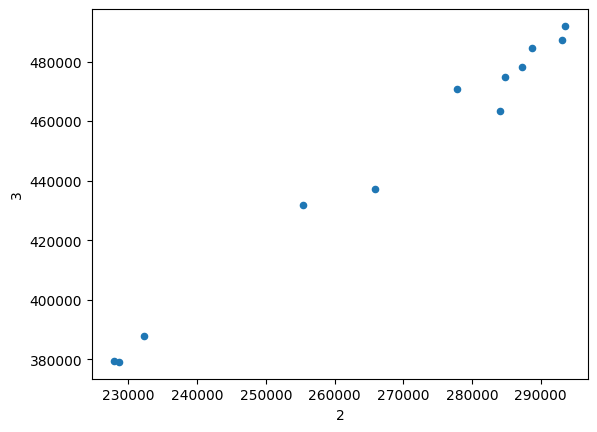

In [16]:
df.query('store_nbr in [1,2,3,4]').pivot_table(index=df['date'].dt.month, columns='store_nbr', values='transactions', aggfunc='sum').plot.scatter(x=2,y=3)

In [22]:
df.loc[:,'transactions']

,transactions
0,770
1,2111
2,2358
3,3487
4,1922
...,...
83483,2804
83484,1573
83485,2255
83486,932


<Axes: ylabel='Frequency'>

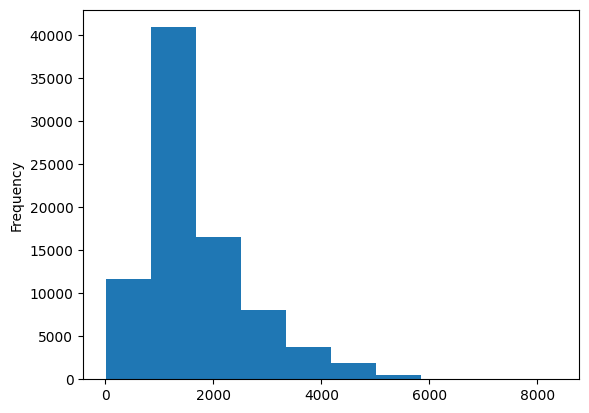

In [19]:
 df.loc[:,'transactions'].plot.hist()

<Axes: ylabel='Frequency'>

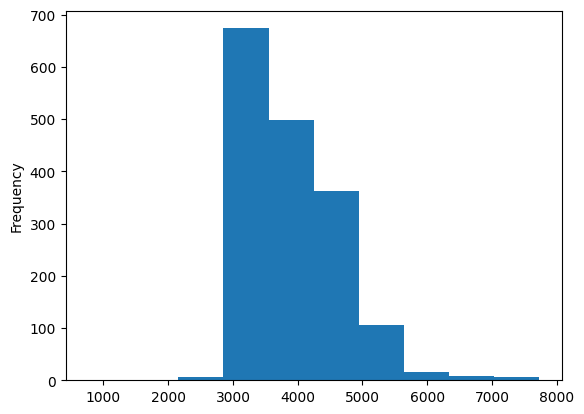

In [21]:
df.loc[df['store_nbr']==47,'transactions'].plot.hist()

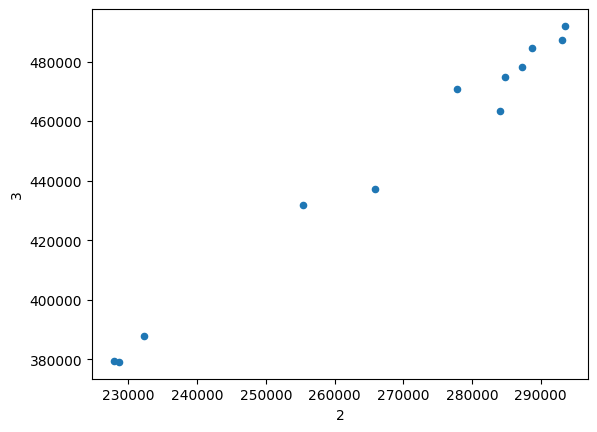

In [24]:
my_var= \
 (df.
  query('store_nbr in [1,2,3,4]')
  .pivot_table(index=df['date'].dt.month, columns='store_nbr', values='transactions', aggfunc='sum')
  .plot.scatter(x=2,y=3))
my_var.figure.savefig('my_plot.png',dpi=300,bbox_inches='tight')

In [25]:
!ls

 my_plot.png  'transactions (1).csv'  'transactions (3).csv'   transactions.csv
 sample_data  'transactions (2).csv'  'transactions (4).csv'


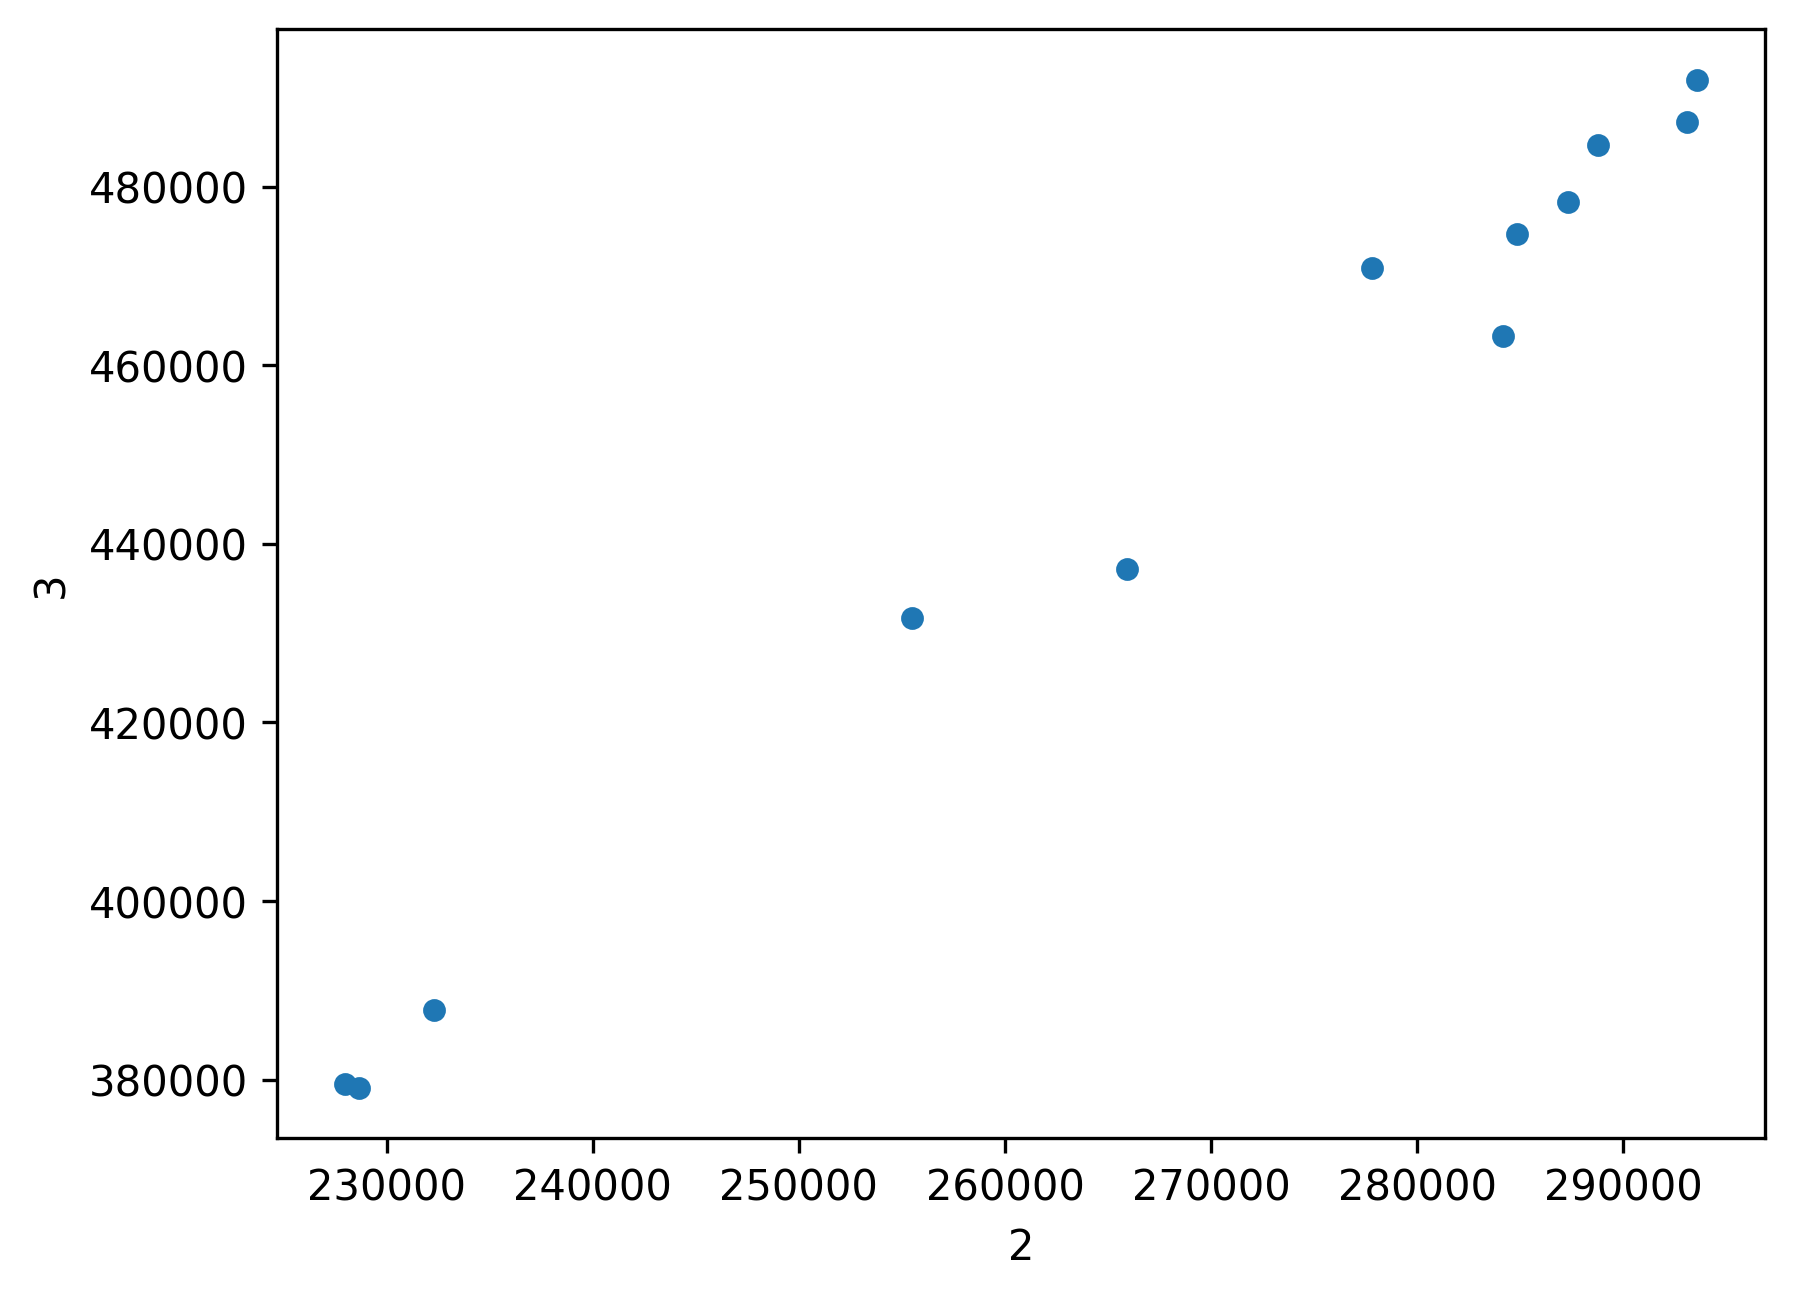

In [26]:
from IPython.display import Image
Image(filename='my_plot.png')